# 神经网络 neural network

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
import matplotlib

In [2]:
data = loadmat('ex3data1.mat')

In [3]:
data

{'X': array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]]),
 '__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011',
 '__version__': '1.0',
 'y': array([[10],
        [10],
        [10],
        ..., 
        [ 9],
        [ 9],
        [ 9]], dtype=uint8)}

In [9]:
x = data['X']
y = data['y']

In [6]:
def sigmoid(z):
    return 1/(np.exp(-z)+1)

In [25]:
def plot_100_imag(x):
    size = int(np.sqrt(x.shape[1]))
    sample_num = np.random.choice(x.shape[0],100)
    sample_imag = x[sample_num,:]
    
    fig,ax = plt.subplots(nrows = 10,ncols = 10,sharex = True,sharey = True,figsize = (8,8))
    for r in range(10):
        for c in range(10):
            ax[r,c].matshow(sample_imag[r*10+c].reshape((size,size)),cmap= 
                           matplotlib.cm.binary)
            plt.xticks(np.array([]))
            plt.yticks(np.array([]))
    plt.show()       

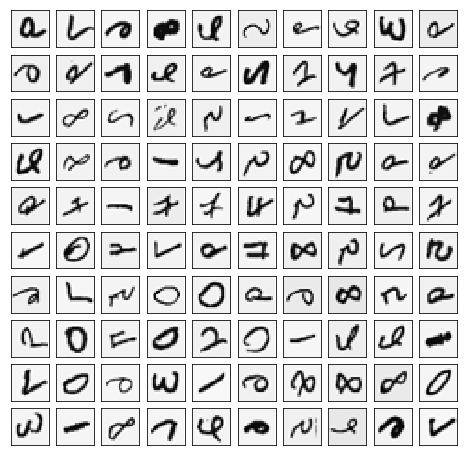

In [26]:
plot_100_imag(x)

In [38]:
x = np.concatenate((np.ones((x.shape[0],1)),x),axis =1)

In [43]:
y[:5,:]

array([[10],
       [10],
       [10],
       [10],
       [10]], dtype=uint8)

In [46]:
y[y==0]=10
y

array([[10],
       [10],
       [10],
       ..., 
       [ 9],
       [ 9],
       [ 9]], dtype=uint8)

In [47]:
y_matrix = []

for k in range(1, 11):
    y_matrix.append((y == k).astype(int))


In [56]:
np.array(y_matrix).shape

(10, 5000, 1)

In [49]:
y==1

array([[False],
       [False],
       [False],
       ..., 
       [False],
       [False],
       [False]], dtype=bool)

In [57]:
y_fak = y.copy()
y_fak[y_fak==10] =0

In [68]:
y_matrix = (y_fak == i).astype(int)
for i in range(1,10):
    tem = (y_fak == i).astype(int)
    y_matrix = np.concatenate((y_matrix,tem),axis = 1)
    
y2 = y_matrix.T

In [69]:
y2.shape

(10, 5000)

In [70]:
y2

array([[1, 1, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 1, 1]])

## train 1 model

In [112]:
def cost(theta,x,y):
    return -np.mean(y*np.log(sigmoid(x@theta))+(1-y)*np.log(1-sigmoid(x@theta)))

In [113]:
def regularized_cost(theta,x,y,l = 1):
    theta_1 = theta[1:]
    regular_term = np.sum(np.power(theta_1,2))*l/2/x.shape[0]
    return cost(theta,x,y)+regular_term

In [114]:
def gradient(theta,x,y):
    return (1/x.shape[0])*x.T@(sigmoid(x@theta)-y)

def regularized_gradient(theta,x,y,l =1):
    theta_1 = theta[1:]
    regularized_theta= (1/x.shape[0])*theta_1
    regularized_term = np.concatenate((np.array([0]), regularized_theta))
    return gradient(theta, x,y) +regularized_term


In [115]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio
import matplotlib
import scipy.optimize as opt
from sklearn.metrics import classification_report#这个包是评价报告

In [116]:
def logistic_regression(x,y,l = 1):
    fea_num = x.shape[1]
    theta = np.zeros(fea_num)
    
    res = opt.minimize(fun = regularized_cost, x0 =theta, args = (x,y,l),method = 'TNC',
                       jac = regularized_gradient,
                       options = {'disp':True})
    final_theta = res.x
    return final_theta


In [117]:
def predict(x,theta):
    prob = sigmoid(x@theta)
    return (prob>=0.5).astype(int)

In [118]:
x.shape

(5000, 401)

In [119]:
t0 = logistic_regression(x,y2[0])

In [120]:
print(t0.shape)

(401,)


In [121]:
y_pred = predict(x,t0)
print("Accuracy = {}".format(np.mean(y2[0] == y_pred)))

Accuracy = 0.9974


# train k model

In [133]:
theta_pre = np.array([logistic_regression(x,y2[i]) for i in range(10)])

In [134]:
theta_pre.shape

(10, 401)

In [135]:
prob_matrix = sigmoid(x@theta_pre.T)

In [136]:
np.set_printoptions(suppress=True)
prob_matrix.shape

(5000, 10)

In [139]:
y_pred_sum = np.argmax(prob_matrix,axis =1)

In [140]:
y_actual = y.copy()
y_actual[y_actual==10] = 0

In [141]:
print(classification_report(y_actual,y_pred_sum))

             precision    recall  f1-score   support

          0       0.97      0.99      0.98       500
          1       0.95      0.99      0.97       500
          2       0.95      0.92      0.93       500
          3       0.95      0.91      0.93       500
          4       0.95      0.95      0.95       500
          5       0.92      0.92      0.92       500
          6       0.97      0.98      0.97       500
          7       0.95      0.95      0.95       500
          8       0.93      0.92      0.92       500
          9       0.92      0.92      0.92       500

avg / total       0.94      0.94      0.94      5000



# 神经网络模型

In [149]:
def load_weights(path):
    data = sio.loadmat(path)
    return data['Theta1'], data['Theta2']

In [151]:
theta_1,theta_2 = load_weights('ex3weights.mat')
theta_1.shape, theta_2.shape

((25, 401), (10, 26))

In [156]:
data = sio.loadmat('ex3data1.mat')
x_n = data['X']
y_n = data['y'].flatten()

In [161]:
x_n = np.concatenate((np.ones((x_n.shape[0],1)), x_n),axis =1)

In [162]:
x_n.shape

(5000, 401)

## feedfoward prediction(前馈预测）

In [168]:
a1 =x_n

In [169]:
z2 = a1@theta_1.T
z2.shape

(5000, 25)

In [170]:
z2 = np.concatenate((np.ones((x_n.shape[0],1)),z2),axis =1)
a2 =sigmoid(z2)
a2.shape

(5000, 26)

In [171]:
z3 = a2@theta_2.T
a3 = sigmoid(z3)
a3

array([[ 0.00013825,  0.0020554 ,  0.00304012, ...,  0.00049102,
         0.00774326,  0.99622946],
       [ 0.00058776,  0.00285027,  0.00414688, ...,  0.00292311,
         0.00235617,  0.99619667],
       [ 0.00010868,  0.0038266 ,  0.03058551, ...,  0.07514539,
         0.0065704 ,  0.93586278],
       ..., 
       [ 0.06278247,  0.00450406,  0.03545109, ...,  0.0026367 ,
         0.68944816,  0.00002744],
       [ 0.00101909,  0.00073436,  0.00037856, ...,  0.01456166,
         0.97598976,  0.00023337],
       [ 0.00005908,  0.00054172,  0.0000259 , ...,  0.00700508,
         0.73281465,  0.09166961]])

In [172]:
a3.shape

(5000, 10)

In [173]:
y_pred = np.argmax(a3,axis = 1)+1
y_pred

array([10, 10, 10, ...,  9,  9,  9])

# 准确率测试

In [174]:
print(classification_report(y_n,y_pred))

             precision    recall  f1-score   support

          1       0.97      0.98      0.97       500
          2       0.98      0.97      0.97       500
          3       0.98      0.96      0.97       500
          4       0.97      0.97      0.97       500
          5       0.98      0.98      0.98       500
          6       0.97      0.99      0.98       500
          7       0.98      0.97      0.97       500
          8       0.98      0.98      0.98       500
          9       0.97      0.96      0.96       500
         10       0.98      0.99      0.99       500

avg / total       0.98      0.98      0.98      5000

